In [1]:
# Install transformers and datasets:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Call libraries:
# Hugging Face related:

from transformers import pipeline
from datasets import load_dataset
from datasets import Dataset

# General
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Text Cleaning Libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from string import punctuation

In [3]:
# Mounting GDrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
# Path to folder in gdrive where data files are: 
pathToFolder = "/gdrive/MyDrive/FA Project_French Book Review/"

In [5]:
#  Read dataset in pandas:
df = pd.read_csv(pathToFolder+"french_books_reviews.csv")

In [6]:
# Data Exploration
df.head()

,Unnamed: 0,book_title,author,reader_review,rating,label
0,0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1
1,1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1
2,2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1
3,3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0
4,4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1


In [7]:
df.shape

(9658, 6)

In [8]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [9]:
df.isnull().sum()

book_title        0
author            0
reader_review    13
rating            0
label             0
dtype: int64

In [10]:
df["reader_review"].fillna(value="No Review", inplace=True)

In [11]:
df.isnull().sum()

book_title       0
author           0
reader_review    0
rating           0
label            0
dtype: int64

In [12]:
np.sort(df['rating'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

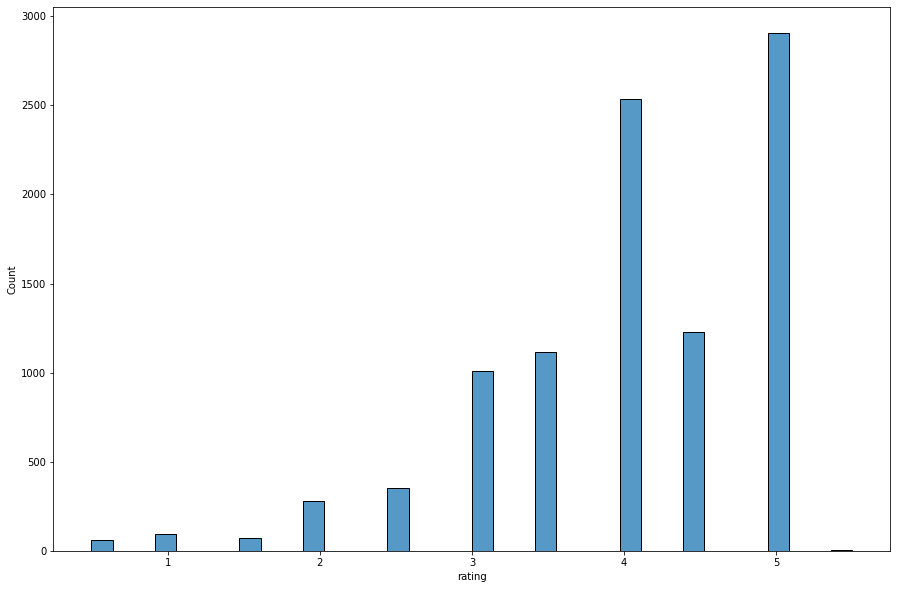

In [13]:
#Book review rating plot 
plt.figure(figsize=(15,10))
sns.histplot(df['rating'])

In [14]:
df.describe()

,rating,label
count,9658.000000,9658.000000
mean,4.020242,0.601677
std,0.934551,0.646211
min,0.500000,-1.000000
25%,3.500000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.500000,1.000000


In [15]:
#Hugging Face model for sentiment analysis
classifier2 = pipeline("sentiment-analysis",
                       model="philschmid/distilbert-base-multilingual-cased-sentiment-2",padding=True, truncation=True,max_length=50, add_special_tokens = True
                       )

In [16]:
#text Cleaning
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("french"))

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import demoji
def handle_emoji(string):
    #x = string.to_string(header=False, index=False)
    emojis = demoji.findall(string)
    #print(emojis)
    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [19]:
def text_cleaner(review):
  # removing the not required texts
  cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
  cleaned_review = re.sub('[^A-Za-z]+', ' ', cleaned_review) #taking only words
  cleaned_review = handle_emoji(cleaned_review)
  cleaned_review = re.sub(r"http\S+", "", cleaned_review) 
  cleaned_review = cleaned_review.lower()

  tokens = nltk.word_tokenize(cleaned_review)

  filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

  lemm_review = [lemmatizer.lemmatize(word)
   for word in filtered_review]
  review = " ".join(lemm_review)
  return(review)

In [20]:
cleanText=[]

for t in df['reader_review']:
 cleanText.append(text_cleaner(t))

df["cleanText"] = cleanText
df.head()

,book_title,author,reader_review,rating,label,cleanText
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,premier roman aborder th lourds inceste enfanc...
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab jeune homme an a ge mental...
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,crire plus secr moire hommes mohamed mbougar s...
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,violence aur lien revenue fen tre peut tre bie...
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,second album guerre alan emmanuel guibert a fa...


In [21]:
u= classifier2("Ce n'est pas le premier roman à aborder les thèmes lourds de l'inceste et de l'enfance martyre, mais il le fait avec une audace et un brio incomparables qui rendent ce livre marquant dans une vie de lecteur. On y sent à quel point l'auteur n'a pas cherché à faire quelque chose, on ne sent jamais l'intention, on sent juste l'urgence, incandescente, à raconter la vérité d'un homme maltraité par la vie au point de dire à la nuit «  tu ne me feras pas peur j'ai plus de noir que toi dans mon enfance.")

In [22]:
u

[{'label': 'neutral', 'score': 0.6183509230613708}]

In [23]:
v=u[0]

In [24]:
list(v.values())[0]

'neutral'

In [25]:
lab=[]
soc=[]
for t in df['cleanText']:
  u= classifier2(t)
  v= list(u[0].values())
  lab.append(v[0])
  soc.append(v[1])
 
df['Label'] = lab
df['Score'] = soc

In [26]:
df.head()

,book_title,author,reader_review,rating,label,cleanText,Label,Score
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,premier roman aborder th lourds inceste enfanc...,positive,0.968669
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab jeune homme an a ge mental...,positive,0.799915
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,crire plus secr moire hommes mohamed mbougar s...,negative,0.804323
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,violence aur lien revenue fen tre peut tre bie...,negative,0.560064
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,second album guerre alan emmanuel guibert a fa...,positive,0.611250


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Positive vs Negative vs Neutral Label count')

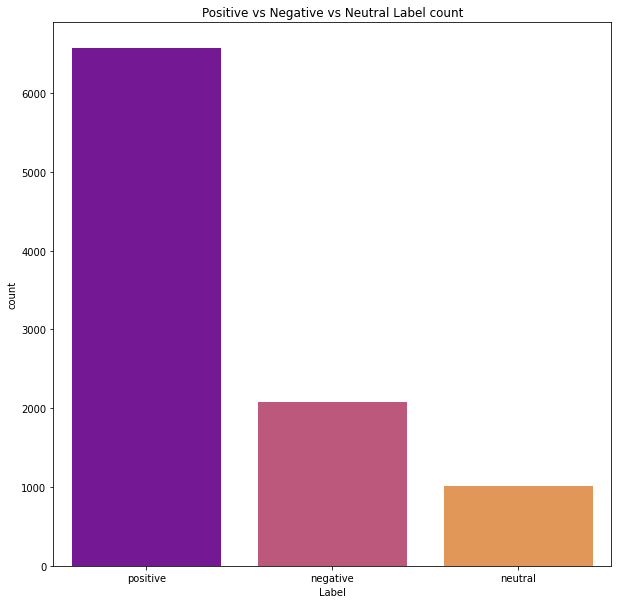

In [99]:
# Plot for hugging face sentiment analysis model
import seaborn as sns
sns.countplot(df['Label'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Positive vs Negative vs Neutral Label count')

We can see the positive ratings are the highest.

In [27]:
def text_cleaner1(review):
  # removing the not required texts
  cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
  cleaned_review = re.sub('[^A-Za-z]+', ' ', cleaned_review) #taking only words
  cleaned_review = handle_emoji(cleaned_review)
  cleaned_review = re.sub(r"http\S+", "", cleaned_review) 
  cleaned_review = cleaned_review.lower()
  return(cleaned_review)

In [28]:
dfe=df[["book_title","author","reader_review","rating","label"]]

In [29]:
dfe.head()

,book_title,author,reader_review,rating,label
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1


In [30]:
cleanText1=[]

for t in dfe['reader_review']:
 cleanText1.append(text_cleaner1(t))

dfe["cleanText"] = cleanText1
dfe.head()

<ipython-input-30-f9aaa35fc63c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe["cleanText"] = cleanText1


,book_title,author,reader_review,rating,label,cleanText
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,ce n est pas le premier roman aborder les th m...
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab est un jeune homme de ans ...
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,pour crire la plus secr te m moire des hommes ...
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,la violence d aur lien est revenue par la fen...
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,dans ce second album de la guerre d alan emman...


In [33]:
df.head()

,book_title,author,reader_review,rating,label,cleanText,Label,Score
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,premier roman aborder th lourds inceste enfanc...,positive,0.968669
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab jeune homme an a ge mental...,positive,0.799915
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,crire plus secr moire hommes mohamed mbougar s...,negative,0.804323
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,violence aur lien revenue fen tre peut tre bie...,negative,0.560064
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,second album guerre alan emmanuel guibert a fa...,positive,0.611250


In [75]:
pip install vaderSentiment-fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 187 kB 8.8 MB/s 
     |████████████████████████████████| 235 kB 39.7 MB/s 
  Created wheel for vaderSentiment-fr: filename=vaderSentiment_fr-1.3.4-py3-none-any.whl size=185986 sha256=0422d56d8f951d6f04f4b473d43a7055318a6af1a8ef55470ffc9b980e17ec12
  Stored in directory: /root/.cache/pip/wheels/a6/a6/8b/6f8461bbebec0a38f5068fc8331472b4a2ae7d614bb3ec2f71
Successfully built vaderSentiment-fr


In [76]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [78]:
phrase = "Une phrase très cool à analyser"
score = SIA.polarity_scores(phrase)

In [79]:
score

{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2247}

In [80]:
analyzer = SentimentIntensityAnalyzer()
dfe['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['cleanText']]
dfe['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['cleanText']]
dfe['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['cleanText']]
dfe['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['cleanText']]

<ipython-input-80-9b861e51c79d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['cleanText']]


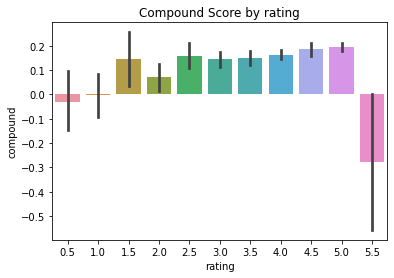

In [100]:
# Compound VADER Plot
ax = sns.barplot(data=dfe, x='rating', y='compound')
ax.set_title('Compound Score by rating')
plt.show()

As we can see that the compound score is fluctuating highly and the most positive comments have the most negative compound score.

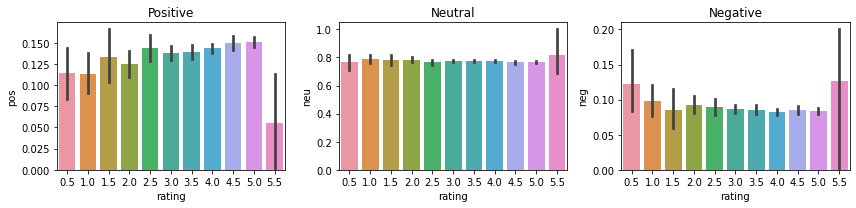

In [97]:
# Positive, Negative and Neutral plot for the VADER sentiment analysis
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=dfe, x='rating', y='pos', ax=axs[0])
sns.barplot(data=dfe, x='rating', y='neu', ax=axs[1])
sns.barplot(data=dfe, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

So, here we can see that the positive words are the highest and for the negative words even though the rating is 5 star there is high level of negative words. 

In [81]:
dfe.head()

,book_title,author,reader_review,rating,label,cleanText,compound,neg,neu,pos
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,ce n est pas le premier roman aborder les th m...,-0.0516,0.187,0.663,0.150
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab est un jeune homme de ans ...,-0.9430,0.241,0.741,0.018
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,pour crire la plus secr te m moire des hommes ...,0.0772,0.106,0.753,0.140
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,la violence d aur lien est revenue par la fen...,-0.8824,0.258,0.580,0.162
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,dans ce second album de la guerre d alan emman...,-0.6249,0.203,0.797,0.000


In [82]:
df.head()

,book_title,author,reader_review,rating,label,cleanText,Label,Score
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,premier roman aborder th lourds inceste enfanc...,positive,0.968669
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab jeune homme an a ge mental...,positive,0.799915
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,crire plus secr moire hommes mohamed mbougar s...,negative,0.804323
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,violence aur lien revenue fen tre peut tre bie...,negative,0.560064
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,second album guerre alan emmanuel guibert a fa...,positive,0.611250


In [83]:
pip install -U textblob-fr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 561 kB 7.0 MB/s 


In [86]:
#Using Textblob sentiment analysis
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob import TextBlob

In [87]:
text = "Quelle belle matinée"
blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [90]:
blob.sentiment

(0.8, 0.8)

In [91]:
def sentiment_analysis(rating_tb):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 rating_tb['TextBlob_Subjectivity'] = rating_tb['cleanText'].apply(getSubjectivity)
 rating_tb['TextBlob_Polarity'] = rating_tb['cleanText'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 rating_tb['TextBlob_Analysis'] = rating_tb['TextBlob_Polarity'].apply(getAnalysis)
 return rating_tb

In [92]:
sentiment_analysis(dfe)

,book_title,author,reader_review,rating,label,cleanText,compound,neg,neu,pos,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Le Démon de la Colline aux Loups,Dimitri Rouchon-Borie,Ce n'est pas le premier roman à aborder les th...,5.0,1,ce n est pas le premier roman aborder les th m...,-0.0516,0.187,0.663,0.150,0.000000,0.000000,Neutral
1,Simple,Marie-Aude Murail,"Simple, alias Barnabé, est un jeune homme de 2...",4.0,1,simple alias barnab est un jeune homme de ans ...,-0.9430,0.241,0.741,0.018,0.304762,-0.033333,Negative
2,La plus secrète mémoire des hommes,Mohamed Mbougar Sarr,Pour écrire La plus secrète mémoire des hommes...,4.0,1,pour crire la plus secr te m moire des hommes ...,0.0772,0.106,0.753,0.140,0.000000,0.000000,Neutral
3,Trancher,Amélie Cordonnier,« La violence d'Aurélien est revenue. Par la f...,3.5,0,la violence d aur lien est revenue par la fen...,-0.8824,0.258,0.580,0.162,0.333333,0.166667,Positive
4,"La guerre d'Alan, tome 2",Emmanuel Guibert,"Dans ce second album de La Guerre d’Alan, Emma...",5.0,1,dans ce second album de la guerre d alan emman...,-0.6249,0.203,0.797,0.000,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,Un grand méchant loup !,Geoffroy de Pennart,Geoffroy de Pennart est un auteur-illustrateur...,4.0,1,geoffroy de pennart est un auteur illustrateur...,0.0000,0.000,1.000,0.000,0.400000,0.000000,Neutral
9654,Travailler: La grande affaire de l'humanité,James Suzman,Seule l’énergie permet au vivant de résister à...,4.0,1,seule l nergie permet au vivant de r sister l ...,-0.8809,0.206,0.681,0.113,1.000000,0.500000,Positive
9655,Leur domaine,Jo Nesbø,Sauf que ce n’est pas publié par Gallmeister… ...,4.0,1,sauf que ce n est pas publi par gallmeister et...,0.0000,0.000,1.000,0.000,0.000000,0.000000,Neutral
9656,Ivan le terrible,Anne Fine,Un jeune Russe arrive dans l’école du narrateu...,4.0,1,un jeune russe arrive dans l cole du narrateur...,-0.0258,0.093,0.817,0.090,0.000000,0.000000,Neutral


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Positive vs Negative vs Neutral Label count')

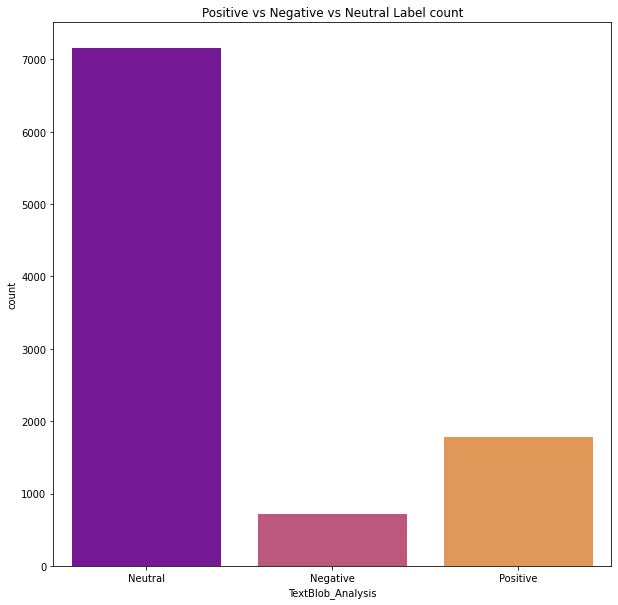

In [94]:
# Plot for TextBlob sentiment analysis model
import seaborn as sns
sns.countplot(dfe['TextBlob_Analysis'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Positive vs Negative vs Neutral Label count')

We can see the neutral ratings are the highest which is contradicting to the real scenario of the ratings.